In [ ]:
!nvidia-smi

Thu Mar 25 23:37:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.4 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!unzip dl_vision.zip

Archive:  dl_vision.zip
   creating: dl_vision/
   creating: dl_vision/base/
  inflating: dl_vision/base/base_model.py  
  inflating: dl_vision/base/base_trainer.py  
 extracting: dl_vision/base/__init__.py  
   creating: dl_vision/base/__pycache__/
  inflating: dl_vision/base/__pycache__/base_model.cpython-38.pyc  
  inflating: dl_vision/base/__pycache__/base_trainer.cpython-38.pyc  
  inflating: dl_vision/base/__pycache__/__init__.cpython-38.pyc  
  inflating: dl_vision/config.yml    
   creating: dl_vision/data/
   creating: dl_vision/data_loader/
  inflating: dl_vision/data_loader/data_loaders.py  
  inflating: dl_vision/data_loader/transforms.py  
 extracting: dl_vision/data_loader/__init__.py  
   creating: dl_vision/data_loader/__pycache__/
  inflating: dl_vision/data_loader/__pycache__/data_loaders.cpython-38.pyc  
  inflating: dl_vision/data_loader/__pycache__/transforms.cpython-38.pyc  
  inflating: dl_vision/data_loader/__pycache__/__init__.cpython-38.pyc  
   creating: dl_v

In [ ]:
%cd dl_vision/

/content/dl_vision


In [ ]:
ls

base/       data/         logs/   runner/  trainer/
config.yml  data_loader/  model/  run.py   utils/


In [ ]:
!cat /content/dl_vision/config.yml

name: CIFAR10
save_dir: saved/
seed: 9
target_device: cuda

arch:
  type: CIFAR10_ResNet18
  args: {}

transforms:
  type: CIFAR10Transforms
  args: {}

data_loader:
  type: CIFAR10DataLoader
  args:
    batch_size: 128
    data_dir: data/
    num_workers: 4
    shuffle: True

criterion: cross_entropy_loss

optimizer:
  type: SGD
  args:
    lr: 0.001
    momentum: 0.9
    weight_decay: 0.0005

training:
  epochs: 50


In [ ]:
# # Create a config file¶

# %%writefile config.yml
# name: CIFAR10
# save_dir: saved/
# seed: 9
# target_device: cuda

# arch:
#   type: CIFAR10_ResNet18
#   args: {}

# transforms:
#   type: CIFAR10Transforms
#   args: {}

# data_loader:
#   type: CIFAR10DataLoader
#   args:
#     batch_size: 128
#     data_dir: data/
#     num_workers: 4
#     shuffle: True

# criterion: cross_entropy_loss

# optimizer:
#   type: SGD
#   args:
#     lr: 0.001
#     momentum: 0.9
#     weight_decay: 0.0005

# training:
#   epochs: 1

Overwriting config.yml


In [ ]:
# !python run.py --config=config.yml

import runner.runner as runners
from utils.config import load_config

config = load_config('config.yml')
# create a runner
runner = runners.Runner(config)

# setup train parameters
runner.setup_train(custom_model=True)

# print model summary
# runner.model_summary(input_size=(1, 28, 28))
runner.model_summary(input_size=(3, 32, 32))

[ 2021-03-25 23:41:27,996 -dl_vision - runner.runner ] INFO: Training Configuration
custom_model
[ 2021-03-25 23:41:28,003 -dl_vision - runner.runner ] INFO: {'arch': {'args': {}, 'type': 'CIFAR10_ResNet18'},
[ 2021-03-25 23:41:28,004 -dl_vision - runner.runner ] INFO:  'criterion': 'cross_entropy_loss',
[ 2021-03-25 23:41:28,006 -dl_vision - runner.runner ] INFO:  'data_loader': {'args': {'batch_size': 128,
[ 2021-03-25 23:41:28,009 -dl_vision - runner.runner ] INFO:                           'data_dir': 'data/',
[ 2021-03-25 23:41:28,012 -dl_vision - runner.runner ] INFO:                           'num_workers': 4,
[ 2021-03-25 23:41:28,013 -dl_vision - runner.runner ] INFO:                           'shuffle': True},
[ 2021-03-25 23:41:28,014 -dl_vision - runner.runner ] INFO:                  'type': 'CIFAR10DataLoader'},
[ 2021-03-25 23:41:28,015 -dl_vision - runner.runner ] INFO:  'name': 'CIFAR10',
[ 2021-03-25 23:41:28,017 -dl_vision - runner.runner ] INFO:  'optimizer': {'args


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified
[ 2021-03-25 23:41:47,534 -dl_vision - runner.runner ] INFO: Intializing the Trainer
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]            

In [ ]:
# Training the model
_ = runner.trainer.train()

[ 2021-03-25 23:41:53,753 -dl_vision - base.base_trainer ] INFO: Starting the Training.
[ 2021-03-25 23:41:53,756 -dl_vision - base.base_trainer ] INFO: Training the model for 50 epochs.



[ 2021-03-25 23:42:23,091 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 0, Average Loss 1.62357, Accuracy: 39.904%  (0.39904)
[ 2021-03-25 23:42:25,230 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 0, Average Loss 1.34576, Accuracy: 50.94%  (0.5094)



[ 2021-03-25 23:42:54,523 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 1, Average Loss 1.22628, Accuracy: 55.542%  (0.55542)
[ 2021-03-25 23:42:56,679 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 1, Average Loss 1.16277, Accuracy: 57.86%  (0.5786)



[ 2021-03-25 23:43:25,920 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 2, Average Loss 1.01805, Accuracy: 63.33%  (0.6333)
[ 2021-03-25 23:43:28,091 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 2, Average Loss 0.97792, Accuracy: 66.3%  (0.663)



[ 2021-03-25 23:43:57,517 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 3, Average Loss 0.86930, Accuracy: 69.19%  (0.6919)
[ 2021-03-25 23:43:59,669 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 3, Average Loss 0.82344, Accuracy: 71.4%  (0.714)



[ 2021-03-25 23:44:29,202 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 4, Average Loss 0.76119, Accuracy: 73.1%  (0.731)
[ 2021-03-25 23:44:31,383 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 4, Average Loss 0.87379, Accuracy: 71.04%  (0.7104)



[ 2021-03-25 23:45:00,839 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 5, Average Loss 0.67412, Accuracy: 76.33%  (0.7633)
[ 2021-03-25 23:45:02,988 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 5, Average Loss 0.68599, Accuracy: 76.49%  (0.7649)



[ 2021-03-25 23:45:32,389 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 6, Average Loss 0.60925, Accuracy: 78.612%  (0.78612)
[ 2021-03-25 23:45:34,551 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 6, Average Loss 0.66678, Accuracy: 77.63%  (0.7763)



[ 2021-03-25 23:46:03,971 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 7, Average Loss 0.55377, Accuracy: 80.636%  (0.80636)
[ 2021-03-25 23:46:06,115 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 7, Average Loss 0.60738, Accuracy: 79.26%  (0.7926)



[ 2021-03-25 23:46:35,461 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 8, Average Loss 0.50841, Accuracy: 82.438%  (0.82438)
[ 2021-03-25 23:46:37,614 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 8, Average Loss 0.55706, Accuracy: 81.01%  (0.8101)



[ 2021-03-25 23:47:06,950 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 9, Average Loss 0.48007, Accuracy: 83.302%  (0.83302)
[ 2021-03-25 23:47:09,096 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 9, Average Loss 0.60578, Accuracy: 79.27%  (0.7927)



[ 2021-03-25 23:47:38,382 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 10, Average Loss 0.45061, Accuracy: 84.148%  (0.84148)
[ 2021-03-25 23:47:40,524 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 10, Average Loss 0.51431, Accuracy: 82.76%  (0.8276)



[ 2021-03-25 23:48:09,860 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 11, Average Loss 0.42281, Accuracy: 85.286%  (0.85286)
[ 2021-03-25 23:48:12,023 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 11, Average Loss 0.60207, Accuracy: 80.42%  (0.8042)



[ 2021-03-25 23:48:41,343 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 12, Average Loss 0.39778, Accuracy: 86.328%  (0.86328)
[ 2021-03-25 23:48:43,506 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 12, Average Loss 0.51232, Accuracy: 82.78%  (0.8278)



[ 2021-03-25 23:49:12,769 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 13, Average Loss 0.37232, Accuracy: 87.134%  (0.87134)
[ 2021-03-25 23:49:14,927 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 13, Average Loss 0.52858, Accuracy: 82.18%  (0.8218)



[ 2021-03-25 23:49:44,213 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 14, Average Loss 0.35494, Accuracy: 87.658%  (0.87658)
[ 2021-03-25 23:49:46,348 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 14, Average Loss 0.47086, Accuracy: 84.27%  (0.8427)



[ 2021-03-25 23:50:15,649 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 15, Average Loss 0.33838, Accuracy: 88.252%  (0.88252)
[ 2021-03-25 23:50:17,804 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 15, Average Loss 0.49449, Accuracy: 84.12%  (0.8412)



[ 2021-03-25 23:50:47,198 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 16, Average Loss 0.31944, Accuracy: 88.966%  (0.88966)
[ 2021-03-25 23:50:49,369 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 16, Average Loss 0.42686, Accuracy: 85.7%  (0.857)



[ 2021-03-25 23:51:18,854 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 17, Average Loss 0.30472, Accuracy: 89.526%  (0.89526)
[ 2021-03-25 23:51:21,058 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 17, Average Loss 0.45840, Accuracy: 85.15%  (0.8515)



[ 2021-03-25 23:51:50,472 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 18, Average Loss 0.29029, Accuracy: 89.93%  (0.8993)
[ 2021-03-25 23:51:52,652 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 18, Average Loss 0.45723, Accuracy: 85.18%  (0.8518)



[ 2021-03-25 23:52:21,988 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 19, Average Loss 0.27298, Accuracy: 90.488%  (0.90488)
[ 2021-03-25 23:52:24,148 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 19, Average Loss 0.43633, Accuracy: 85.59%  (0.8559)



[ 2021-03-25 23:52:53,456 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 20, Average Loss 0.26365, Accuracy: 90.826%  (0.90826)
[ 2021-03-25 23:52:55,619 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 20, Average Loss 0.46321, Accuracy: 85.39%  (0.8539)



[ 2021-03-25 23:53:24,954 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 21, Average Loss 0.25347, Accuracy: 91.246%  (0.91246)
[ 2021-03-25 23:53:27,115 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 21, Average Loss 0.41261, Accuracy: 86.74%  (0.8674)



[ 2021-03-25 23:53:56,412 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 22, Average Loss 0.23711, Accuracy: 91.838%  (0.91838)
[ 2021-03-25 23:53:58,580 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 22, Average Loss 0.45560, Accuracy: 85.79%  (0.8579)



[ 2021-03-25 23:54:27,899 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 23, Average Loss 0.23202, Accuracy: 91.97%  (0.9197)
[ 2021-03-25 23:54:30,048 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 23, Average Loss 0.42716, Accuracy: 86.6%  (0.866)



[ 2021-03-25 23:54:59,349 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 24, Average Loss 0.21649, Accuracy: 92.372%  (0.92372)
[ 2021-03-25 23:55:01,513 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 24, Average Loss 0.45740, Accuracy: 85.45%  (0.8545)



[ 2021-03-25 23:55:30,839 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 25, Average Loss 0.20417, Accuracy: 92.78%  (0.9278)
[ 2021-03-25 23:55:32,999 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 25, Average Loss 0.44551, Accuracy: 86.53%  (0.8653)



[ 2021-03-25 23:56:02,311 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 26, Average Loss 0.19994, Accuracy: 93.056%  (0.93056)
[ 2021-03-25 23:56:04,475 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 26, Average Loss 0.45114, Accuracy: 86.47%  (0.8647)



[ 2021-03-25 23:56:33,865 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 27, Average Loss 0.19151, Accuracy: 93.37%  (0.9337)
[ 2021-03-25 23:56:36,023 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 27, Average Loss 0.38925, Accuracy: 87.45%  (0.8745)



[ 2021-03-25 23:57:05,683 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 28, Average Loss 0.18275, Accuracy: 93.59%  (0.9359)
[ 2021-03-25 23:57:07,870 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 28, Average Loss 0.43905, Accuracy: 86.55%  (0.8655)



[ 2021-03-25 23:57:37,352 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 29, Average Loss 0.17722, Accuracy: 93.806%  (0.93806)
[ 2021-03-25 23:57:39,543 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 29, Average Loss 0.40755, Accuracy: 87.69%  (0.8769)



[ 2021-03-25 23:58:08,997 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 30, Average Loss 0.16443, Accuracy: 94.23%  (0.9423)
[ 2021-03-25 23:58:11,181 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 30, Average Loss 0.39752, Accuracy: 88.0%  (0.88)



[ 2021-03-25 23:58:40,688 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 31, Average Loss 0.15728, Accuracy: 94.482%  (0.94482)
[ 2021-03-25 23:58:42,866 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 31, Average Loss 0.46157, Accuracy: 86.62%  (0.8662)



[ 2021-03-25 23:59:12,387 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 32, Average Loss 0.15067, Accuracy: 94.824%  (0.94824)
[ 2021-03-25 23:59:14,540 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 32, Average Loss 0.45492, Accuracy: 86.81%  (0.8681)



[ 2021-03-25 23:59:44,022 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 33, Average Loss 0.14632, Accuracy: 94.892%  (0.94892)
[ 2021-03-25 23:59:46,187 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 33, Average Loss 0.44327, Accuracy: 87.71%  (0.8771)



[ 2021-03-26 00:00:15,632 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 34, Average Loss 0.14305, Accuracy: 95.068%  (0.95068)
[ 2021-03-26 00:00:17,816 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 34, Average Loss 0.44561, Accuracy: 87.23%  (0.8723)



[ 2021-03-26 00:00:47,203 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 35, Average Loss 0.13341, Accuracy: 95.292%  (0.95292)
[ 2021-03-26 00:00:49,367 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 35, Average Loss 0.41152, Accuracy: 88.18%  (0.8818)



[ 2021-03-26 00:01:18,715 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 36, Average Loss 0.12941, Accuracy: 95.498%  (0.95498)
[ 2021-03-26 00:01:20,890 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 36, Average Loss 0.42576, Accuracy: 88.02%  (0.8802)



[ 2021-03-26 00:01:50,312 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 37, Average Loss 0.12098, Accuracy: 95.814%  (0.95814)
[ 2021-03-26 00:01:52,491 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 37, Average Loss 0.41848, Accuracy: 87.86%  (0.8786)



[ 2021-03-26 00:02:21,953 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 38, Average Loss 0.11944, Accuracy: 95.802%  (0.95802)
[ 2021-03-26 00:02:24,122 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 38, Average Loss 0.41867, Accuracy: 88.44%  (0.8844)



[ 2021-03-26 00:02:53,667 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 39, Average Loss 0.11229, Accuracy: 96.04%  (0.9604)
[ 2021-03-26 00:02:55,835 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 39, Average Loss 0.42721, Accuracy: 87.81%  (0.8781)



[ 2021-03-26 00:03:25,381 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 40, Average Loss 0.10918, Accuracy: 96.166%  (0.96166)
[ 2021-03-26 00:03:27,568 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 40, Average Loss 0.39502, Accuracy: 88.52%  (0.8852)



[ 2021-03-26 00:03:57,135 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 41, Average Loss 0.10476, Accuracy: 96.346%  (0.96346)
[ 2021-03-26 00:03:59,310 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 41, Average Loss 0.41882, Accuracy: 88.42%  (0.8842)



[ 2021-03-26 00:04:28,808 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 42, Average Loss 0.10085, Accuracy: 96.5%  (0.965)
[ 2021-03-26 00:04:30,980 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 42, Average Loss 0.39381, Accuracy: 89.02%  (0.8902)



[ 2021-03-26 00:05:00,362 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 43, Average Loss 0.09804, Accuracy: 96.53%  (0.9653)
[ 2021-03-26 00:05:02,539 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 43, Average Loss 0.48384, Accuracy: 87.54%  (0.8754)



[ 2021-03-26 00:05:31,949 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 44, Average Loss 0.09298, Accuracy: 96.754%  (0.96754)
[ 2021-03-26 00:05:34,150 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 44, Average Loss 0.39190, Accuracy: 89.37%  (0.8937)



[ 2021-03-26 00:06:03,538 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 45, Average Loss 0.09173, Accuracy: 96.824%  (0.96824)
[ 2021-03-26 00:06:05,701 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 45, Average Loss 0.44206, Accuracy: 88.24%  (0.8824)



[ 2021-03-26 00:06:35,081 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 46, Average Loss 0.08256, Accuracy: 97.074%  (0.97074)
[ 2021-03-26 00:06:37,273 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 46, Average Loss 0.48110, Accuracy: 87.42%  (0.8742)



[ 2021-03-26 00:07:06,649 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 47, Average Loss 0.07840, Accuracy: 97.27%  (0.9727)
[ 2021-03-26 00:07:08,821 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 47, Average Loss 0.42311, Accuracy: 88.97%  (0.8897)



[ 2021-03-26 00:07:38,307 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 48, Average Loss 0.07908, Accuracy: 97.256%  (0.97256)
[ 2021-03-26 00:07:40,444 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 48, Average Loss 0.43417, Accuracy: 88.75%  (0.8875)



[ 2021-03-26 00:08:09,869 -dl_vision - trainer.trainer ] INFO: Train Set: Epoch 49, Average Loss 0.07538, Accuracy: 97.402%  (0.97402)
[ 2021-03-26 00:08:12,044 -dl_vision - trainer.trainer ] INFO: Test Set: Epoch 49, Average Loss 0.39824, Accuracy: 89.28%  (0.8928)
Training Done base.


In [ ]:
# runner.trainer.test_metric

In [ ]:
# runner.trainer.train_metric

[ 2021-03-26 00:15:01,794 -dl_vision - runner.runner ] INFO: Plotting the Metrics.


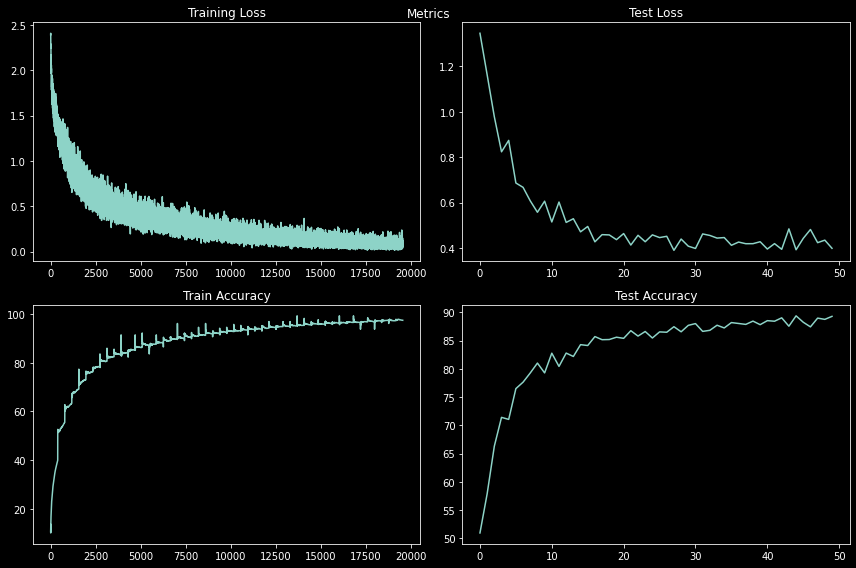

In [9]:
# plot the metrics
plt=runner.plot_metrics()